In [2]:
from sklearn.model_selection import StratifiedKFold as fold
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np
from numpy import transpose as t

import pandas as pd

# from plotnine import *
# from plotnine.data import mpg

from copy import deepcopy as copy

In [3]:

def sigmoid(inpt):
    return 1.0 / (1.0 + np.exp(-1 * inpt))

In [24]:
data = load_iris()
dx   = np.array(data['data'])
dx   = (dx - np.mean(dx))/np.std(dx)

dy   = data['target']

In [25]:
noNise = 0
mu, sigma = 0, 1
np.random.seed(0)
s = noNise*150
noise = np.random.normal(mu, sigma, s)
noise = noise.reshape(150,noNise)
print(noise.shape)

(150, 0)


In [26]:
dx = np.append(dx, noise, axis=1)
print(dx.shape)

(150, 4)


In [28]:
nfold = 10
x     = dx
y     = dy

model = MLPClassifier(
    solver = 'adam',
    alpha = 0,
    hidden_layer_sizes = (2,),
    random_state = 1,
    activation = 'identity',
    learning_rate_init = 0.01)

skf = fold(n_splits=nfold)
for k in (skf.split(x, y)):
    pass

temp1 = []
temp2 = []
temp3 = []
temp4 = []
for i in range(5300):
    model.partial_fit(x, y, classes=np.unique(y))
    temp1.append(np.copy((model.coefs_[0].reshape(8))))
    temp2.append(np.copy((model.coefs_[1].reshape(6))))
    temp3.append(np.copy((model.score(x,y))))
    temp4.append(np.copy((model.loss_)))

In [29]:
# for i in range(len(temp)):
#     print(np.append(temp[i][0].reshape(temp[i][0].shape[0]+temp[i][0].shape[1]), temp[i][1].reshape(temp[i][1].shape[0]+temp[i][1].shape[1])))


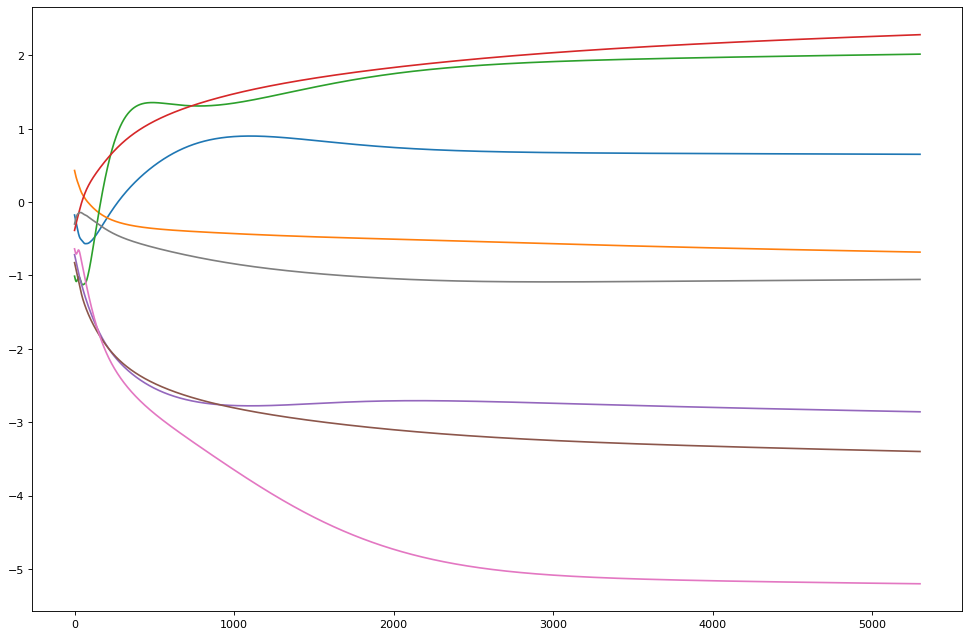

In [30]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
yp = temp1
xp = range(5300) 
# lp = ['w11_21','w11_22','w12_21','w12_22','w13_21','w13_22','w14_21','w14_22','w21_31','w21_32','w21_33','w22_31','w22_32','w22_33']
plt.plot(xp, yp)


In [ ]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
yp = temp2
xp = range(500) 
# lp = ['w11_21','w11_22','w12_21','w12_22','w13_21','w13_22','w14_21','w14_22','w21_31','w21_32','w21_33','w22_31','w22_32','w22_33']
plt.plot(xp, yp)

In [7]:
%time
nfold = 10
x     = dx
y     = dy
iter_ = 6000
hiddenNode = [2]
learningRate = 0.001
seed = 1

skf = fold(n_splits=nfold)
trScore = np.array([[None] * iter_] * 10)
tsScore = np.array([[None] * iter_] * 10)
trAcc   = np.array([[None] * iter_] * 10)
tsAcc   = np.array([[None] * iter_] * 10)
for i,k in enumerate(skf.split(x, y)):
    
    model = MLPClassifier(solver = 'adam', alpha = 0, hidden_layer_sizes = tuple(hiddenNode), random_state = seed, activation = 'logistic', learning_rate_init = learningRate, shuffle = False, tol = 0)
    
    xtr = x[k[0]]
    xts = x[k[1]]
    ytr = y[k[0]]
    yts = y[k[1]]
    
    for j in range(iter_):
        model.partial_fit(xtr, ytr, classes=np.unique(ytr))
        trScore[i,j] = log_loss(ytr, (np.copy(model.predict_proba(xtr))), eps = 1e-12)
        tsScore[i,j] = log_loss(yts, (np.copy(model.predict_proba(xts))), eps = 1e-12)
        trAcc[i,j] = np.copy(model.score(xtr, ytr))
        tsAcc[i,j] = np.copy(model.score(xts, yts))
        
trScore = np.mean(trScore, axis = 0)
tsScore = np.mean(tsScore, axis = 0)
trAcc = np.mean(trAcc, axis = 0)
tsAcc = np.mean(tsAcc, axis = 0)



CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs


KeyboardInterrupt: 

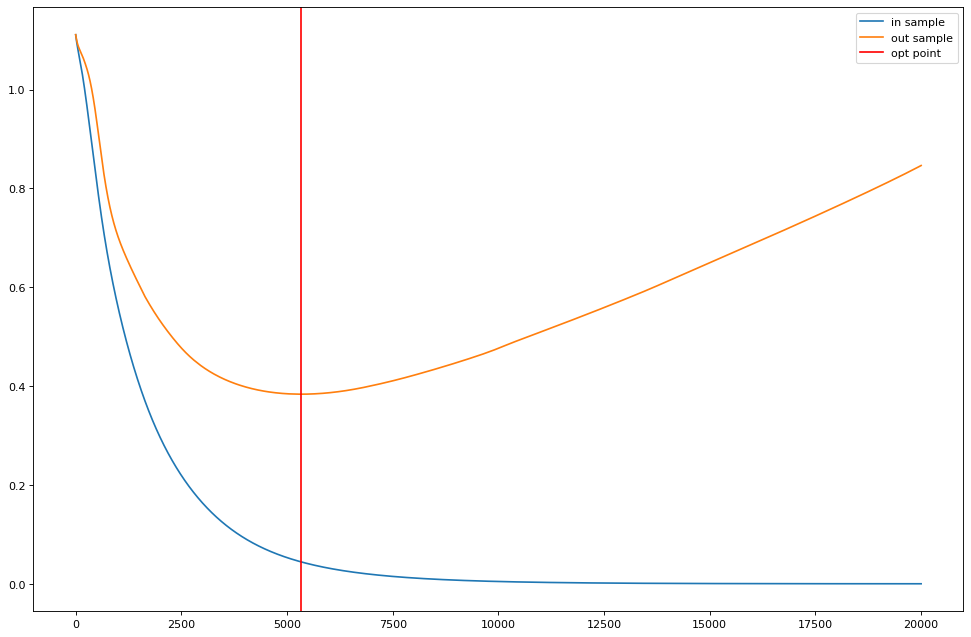

In [9]:
figure(num=None, figsize=(15, 10), dpi=80)

yp1    = trScore[:20000]
xp1 = range(iter_)[:20000] 
plt.plot(xp1, yp1, label = 'in sample')

yp2 = tsScore[:20000]
xp2 = range(iter_)[:20000] 
plt.plot(xp2, yp2, label = 'out sample')

plt.axvline(x=np.argmin(tsScore), c ='r', label = 'opt point')

plt.legend()
plt.show()

In [10]:
print(trScore[np.argmin(trScore)])
print(tsScore[np.argmin(tsScore)])

5.842980422304892e-05
0.38370307252034136


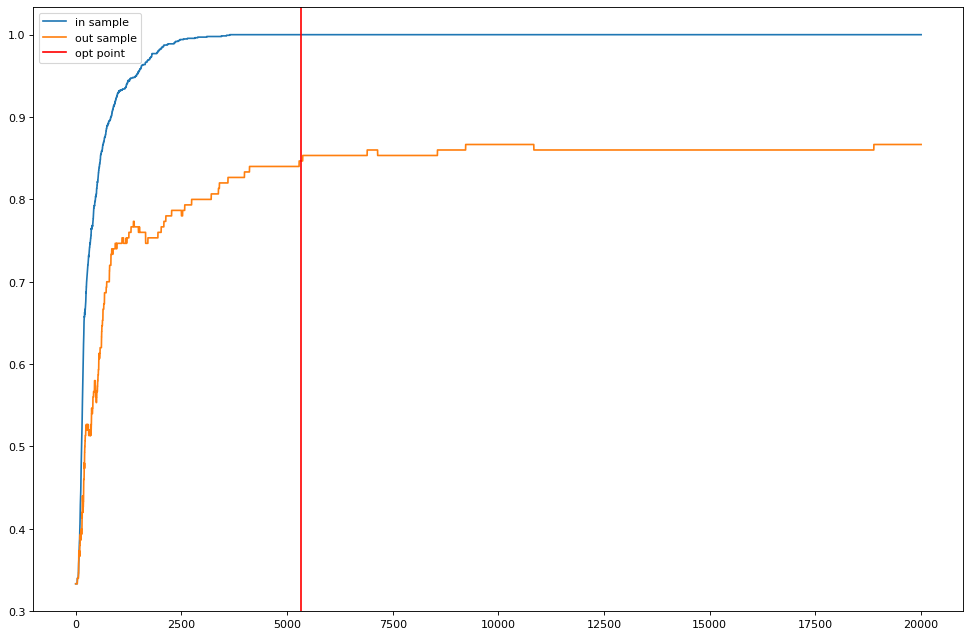

1.0
0.8466666666666667


In [11]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
yp1 = trAcc
xp1 = range(iter_) 
plt.plot(xp1, yp1, label = 'in sample')
yp2 = tsAcc
xp2 = range(iter_) 
plt.plot(xp2, yp2, label = 'out sample')
plt.axvline(x=np.argmin(tsScore), c ='r', label = 'opt point')
plt.legend()
plt.show()
print(trAcc[np.argmin(tsScore)])
print(tsAcc[np.argmin(tsScore)])

In [12]:
np.argmin(tsScore)

5327

In [13]:
main = MLPClassifier(solver = 'adam', alpha = 0, hidden_layer_sizes = tuple(hiddenNode), random_state = seed, activation = 'logistic', learning_rate_init = learningRate, max_iter = np.argmin(tsScore), shuffle = False, tol = 0)
main.fit(x,y)
print(main.predict(x))
print(main.score(x, y))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
1.0


/Users/pawarit/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5327) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [14]:
def stochastic_universal(fitness, popSize):
    fitn = fitness * 10
    fitn = fitn
    sum_f = np.sum(fitn)
    mean_f = sum_f / popSize
    pointer = np.random.random() * mean_f
    
    cum_f = [np.sum(fitn[:i+1]) for i in range(len(fitn))] 
    cum_f[:0] = [0]
    cum_f = np.array(cum_f) # cumulative fitness
    
    selected = list()
    
    for i in range(popSize):
        pn = np.where((pointer > cum_f[:-1]) & (pointer < cum_f[1:]))[0]
        if len(pn) > 0:
            selected.append(pn[0])
        pointer += mean_f
        
    return np.array(selected)

def crossover(parents):
    parents = list(parents)
    offspring = []
    while (len(parents) > 1):
        p0, p1 = [parents.pop(np.random.randint(0, len(parents))) for i in range(2)]
        pointer = np.random.randint(0, p0.shape[0]) if np.random.uniform(0,1) < 0.7 else 0
        of0 = np.append(p0[:pointer], p1[pointer:], axis = 0)
        of1 = np.append(p1[:pointer], p0[pointer:], axis = 0)
        offspring.extend([of0,of1])
        
    return np.array(offspring)

def mutant(p):
    p = list(p)
    o = []
    while (len(p) >= 1):
        o1 = p.pop(0)
        for i in range(o1.shape[0]):
            if np.random.uniform(0,1) > 0.99:
                if o1[i] == 0:
                    o1[i] = 1
                else :
                    o1[i] = 0
        o.extend([o1])
    return np.array(o)



In [ ]:
%%time
SizePopulation = 10
SizePopulation *= 10
Generation = 50

my_data = dict()
for seedadd in range(100):
    np.random.seed((100 + seedadd))

    fn = np.array([[None]*SizePopulation]*Generation)
    po = np.array([[[None]*dx.shape[1]]*SizePopulation]*Generation)

    # random population
    population = np.array([np.random.choice(2, dx.shape[1]) for i in range(SizePopulation)])

    for gen in range(Generation):
        print(str(seedadd) + " : " + str(gen), end = '\r')

        # find fitness
        fitness = np.array([None]*SizePopulation)

        for i,d in enumerate(population):
            temp = copy(main)
            temp.coefs_[0] = t(t(temp.coefs_[0]) * d)
    #         fitness[i] = log_loss(dy, (np.copy(temp.predict_proba(dx))), eps = 1e-12)
            fitness[i] = temp.score(dx,dy)
        fn[gen] = copy(fitness)
        po[gen] = copy(population)

        indexSelect = stochastic_universal(fitness, (SizePopulation))

        child = crossover(copy(population[indexSelect]))
        child = mutant(copy(child))

        population = copy(child)
        
        my_data['fn'+str(seedadd)] = copy(fn)
        my_data['po'+str(seedadd)] = copy(po)

In [ ]:
%%time
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
yp = fn
xp = range(fn.shape[0])
plt.plot(xp, yp, alpha = 0.1)


In [ ]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
yp = np.mean(fn,axis = 1)
xp = range(fn.shape[0]) 
plt.plot(xp, yp)

In [ ]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
yp = np.sum(po, axis = 1)
xp = range(fn.shape[0]) 
plt.plot(xp, yp)

In [ ]:
np.sum(po, axis = 1)[-1]

In [ ]:
for i in (np.argsort(np.sum(po, axis = 1)[-1]) + 1)[::-1]:
    print("attb: %3d, frequency : %3d" % (i, np.sum(po, axis = 1)[-1][i-1]))

In [ ]:
!say 'help'

In [ ]:
dx.shape

In [ ]:
attb:   4, frequency :  99
attb:   3, frequency :  97
attb:   1, frequency :  96
attb:   2, frequency :  83
attb:  13, frequency :  69
attb:  12, frequency :  65
attb:  26, frequency :  62
attb:  20, frequency :  61
attb:  19, frequency :  60
attb:   6, frequency :  59
attb:   5, frequency :  58
attb:   9, frequency :  58
attb:  22, frequency :  56
attb:  18, frequency :  55
attb:  29, frequency :  54
attb:  16, frequency :  52
attb:  24, frequency :  51
attb:  17, frequency :  51
attb:   8, frequency :  50
attb:  15, frequency :  49
attb:  21, frequency :  48
attb:  25, frequency :  48
attb:   7, frequency :  46
attb:  14, frequency :  45
attb:  27, frequency :  42
attb:  11, frequency :  41
attb:  23, frequency :  39
attb:  30, frequency :  39
attb:  28, frequency :  36
attb:  10, frequency :  32

In [ ]:
tempsumfn = np.array([[0.]*SizePopulation]*Generation)
tempsumpo = np.array([[[0.]*dx.shape[1]]*SizePopulation]*Generation)
for seedadd in range(50):
    tempsumfn = tempsumfn + my_data['fn'+str(seedadd)]
    tempsumpo = tempsumpo + my_data['po'+str(seedadd)]
    
tempsumfn = tempsumfn / 50
tempsumpo = tempsumpo / 50

In [ ]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
yp = np.mean(tempsumfn,axis = 1)
xp = range(tempsumfn.shape[0]) 
plt.plot(xp, yp)

In [ ]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
yp = np.sum(tempsumpo, axis = 1)
xp = range(tempsumfn.shape[0]) 
plt.plot(xp, yp)

In [ ]:
for i in (np.argsort(np.sum(tempsumpo, axis = 1)[-1]) + 1)[::-1]:
    print("attb: %3d, frequency : %3d" % (i, np.sum(tempsumpo, axis = 1)[-1][i-1]))

In [4]:
np.random.random()

0.6212642888414912